In [1]:
import pandas as pd
from matplotlib import pyplot
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 25,5

In [3]:
electricitytimeseries = pd.read_csv('Electric_Production.csv',header=0,index_col=0)

In [4]:
electricitytimeseries.shape

(397, 1)

In [7]:
electricitytimeseries.head()

,IPG2211A2N
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


# Moving Average Method

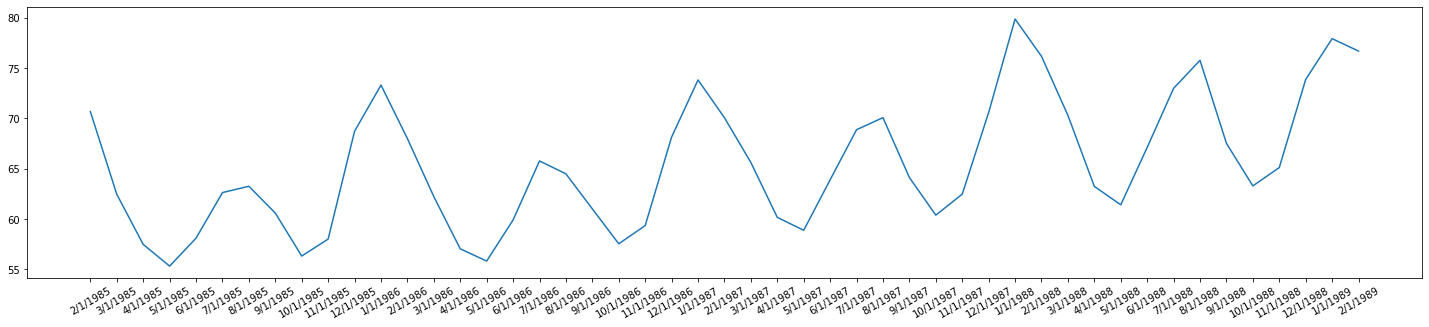

In [12]:
plt.plot(electricitytimeseries[1:50]['IPG2211A2N'])
plt.xticks(rotation=30)
plt.show()

In [13]:
rollingseries = electricitytimeseries[1:50].rolling(window=5)

In [14]:
rollingmean = rollingseries.mean()
print(rollingmean.head(10))

           IPG2211A2N
DATE                 
2/1/1985          NaN
3/1/1985          NaN
4/1/1985          NaN
5/1/1985          NaN
6/1/1985     60.79982
7/1/1985     59.18946
8/1/1985     59.34912
9/1/1985     59.97176
10/1/1985    60.17182
11/1/1985    60.15384


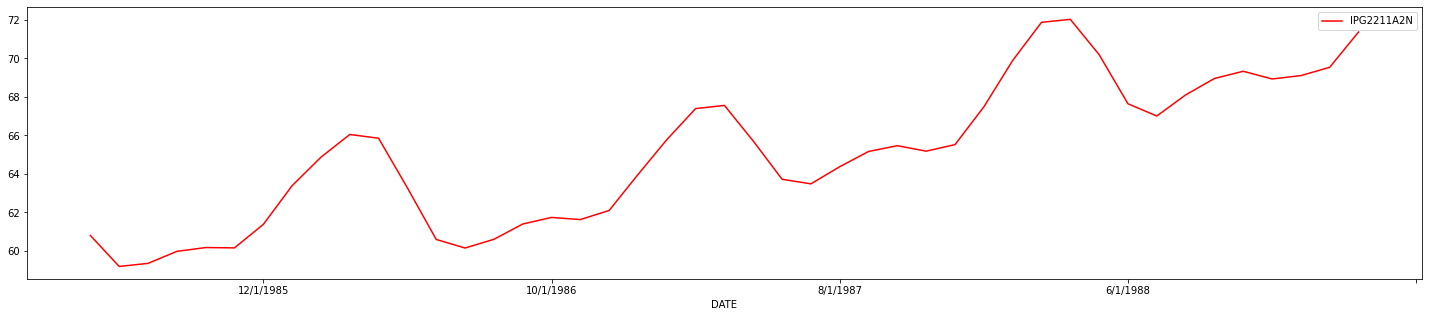

In [15]:
rollingmean.plot(color='red')
pyplot.show()

# Simple Exponential Smoothing

In [16]:
data = electricitytimeseries[1:50]

fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)

fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

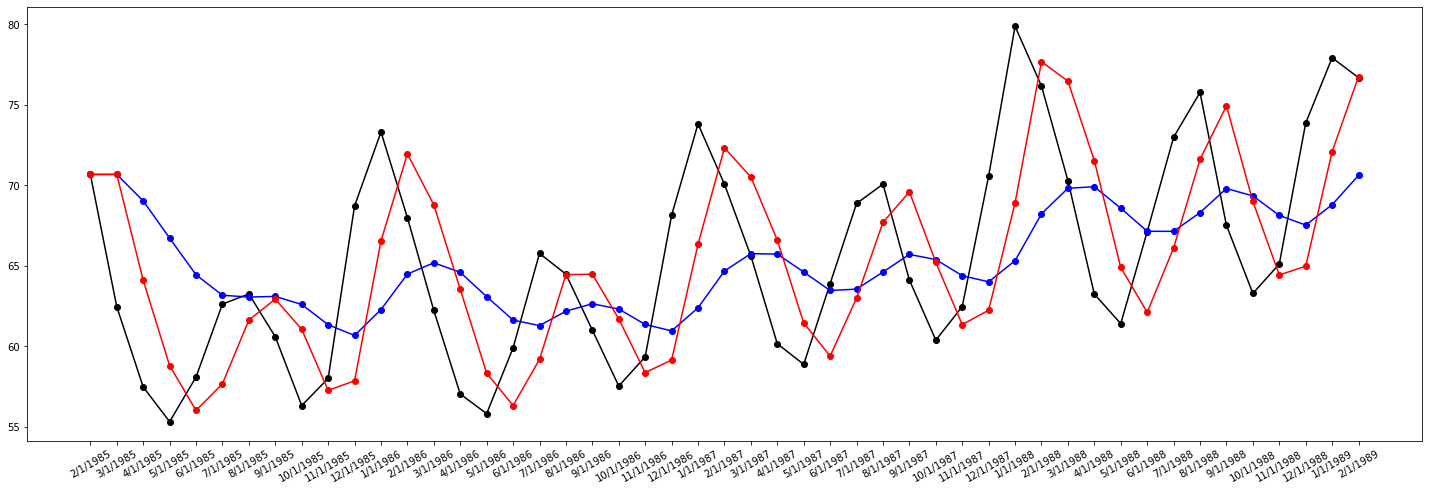

In [18]:
plt.figure(figsize=(25,8))
plt.plot(electricitytimeseries[1:50],marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues,marker='o',color='blue')
plt.plot(fit2.fittedvalues,marker='o',color='red')

In [19]:
fit1 = Holt(data).fit()     #assumptions - linear trend
fit2 = Holt(data, exponential=True).fit()   #assumption - exponential trend

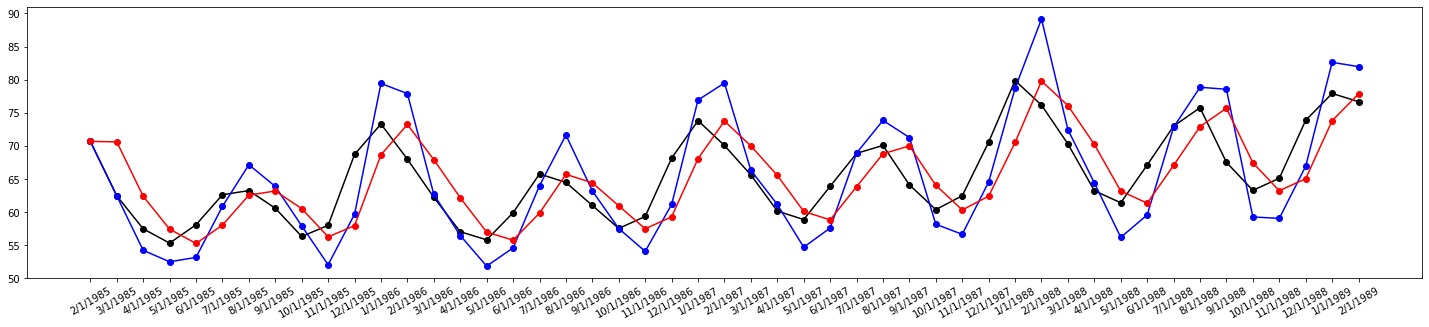

In [20]:
plt.plot(data,marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues,marker='o',color='blue')
plt.plot(fit2.fittedvalues,marker='o',color='red')